In [30]:
from sklearn import preprocessing
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [31]:
dataset_path = "/content/high_popularity_spotify_data.csv"
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [32]:
print(df["playlist_genre"].unique())

['pop' 'rock' 'jazz' 'classical' 'hip-hop' 'afrobeats' 'latin' 'indian'
 'country' 'r&b' 'electronic' 'soul' 'gaming' 'j-pop' 'metal' 'reggae'
 'k-pop' 'arabic' 'punk' 'blues' 'folk' 'lofi' 'brazilian' 'turkish'
 'ambient' 'korean' 'world' 'indie']


In [33]:
genre_map = {
    "pop": 1,
    "rock": 2,
    "classical": 3,
    "hip-hop": 4,
    "afrobeats": 5,
    "latin": 6,
    "indian": 7,
    "country": 8,
    "r&b": 9,
    "electronic": 10,
    "soul": 11,
    "gaming": 12,
    "j-pop": 13,
    "metal": 14,
    "reggae": 15,
    "k-pop": 16,
    "arabic": 17,
    "punk": 18,
    "blues": 19,
    "folk": 20,
    "lofi": 21,
    "brazilian": 22,
    "turkish": 23,
    "ambient": 24,
    "korean": 25,
    "world": 26,
    "indie": 27
}
df["playlist_genre"] = df["playlist_genre"].map(genre_map)

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

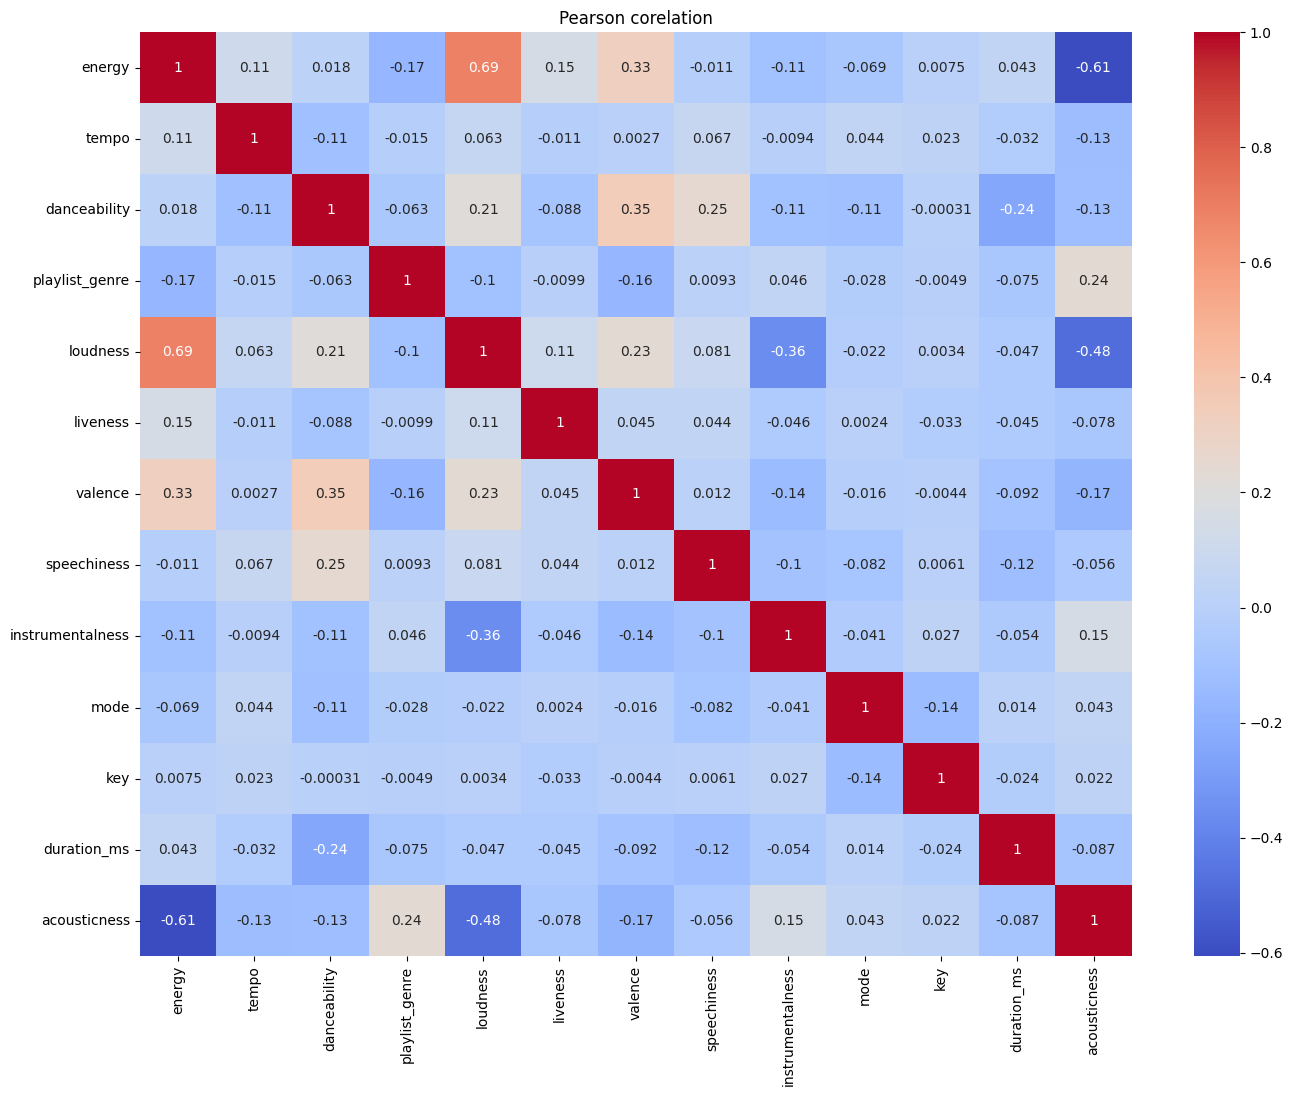

In [35]:
num_colls = ["energy", "tempo", "danceability", "playlist_genre", "loudness", "liveness", "valence", "speechiness", "instrumentalness", "mode", "key", "duration_ms", "acousticness"]
corr_pearson = df[num_colls].corr(method="pearson")

plt.figure(figsize=(16, 12))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm")
plt.title("Pearson corelation")
plt.show

In [36]:
X = df[["energy"]]
y = df["loudness"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

In [38]:
model = LinearRegression().fit(X_train, y_train)
y_pred_multiple = model.predict(X_test)

In [39]:
mae = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

MAE: 0.58
MSE: 0.58
RMSE: 0.76
R^2: 0.36
        Coefficient
energy    12.623565


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


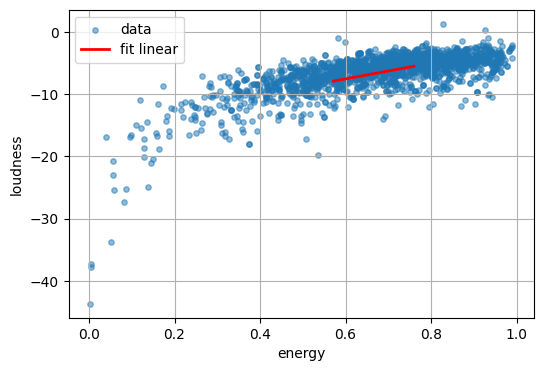

In [40]:
xs = np.linspace(X_test.values.min(), X_test.values.max(), 200).reshape(-1, 1)
ys = model.predict(xs)

plt.figure(figsize = (6, 4))
plt.scatter(X, y, s = 15, alpha = 0.5, label = 'data')
plt.plot(xs, ys, color= 'red' , linewidth = 2, label = 'fit linear')
plt.xlabel("energy")
plt.ylabel("loudness")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [42]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

In [43]:
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R²: 0.3605147395987699
RMSE: 0.5820057672553256


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


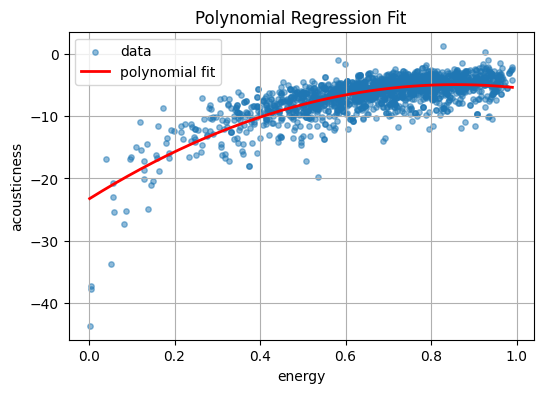

In [44]:
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(6,4))
plt.scatter(X, y, s=15, alpha=0.5, label='data')
plt.plot(X_plot, y_plot, 'r', linewidth=2, label='polynomial fit')

plt.xlabel("energy")
plt.ylabel("acousticness")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
X_multiple = df[["speechiness", "valence", "loudness"]]
y_multiple = df["danceability"]

In [46]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=2, random_state=42)

In [47]:
df.fillna(0, inplace=True)


In [48]:
df.isna().sum()

,0
energy,0
tempo,0
danceability,0
playlist_genre,0
loudness,0
liveness,0
valence,0
track_artist,0
time_signature,0
speechiness,0


In [49]:
print(df["danceability"].dtype)

float64


In [50]:
model = LinearRegression().fit(X_train_multiple, y_train_multiple)
model.fit(X_train_multiple, y_train_multiple)
y_multiple_pred = model.predict(X_test_multiple)

In [51]:
mae = mean_squared_error(y_test_multiple, y_pred_multiple)
mse = mean_squared_error(y_test_multiple, y_pred_multiple)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_multiple, y_pred_multiple)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

MAE: 54.75
MSE: 54.75
RMSE: 7.40
R^2: -14242.44


ValueError: Shape of passed values is (3, 1), indices imply (1, 1)

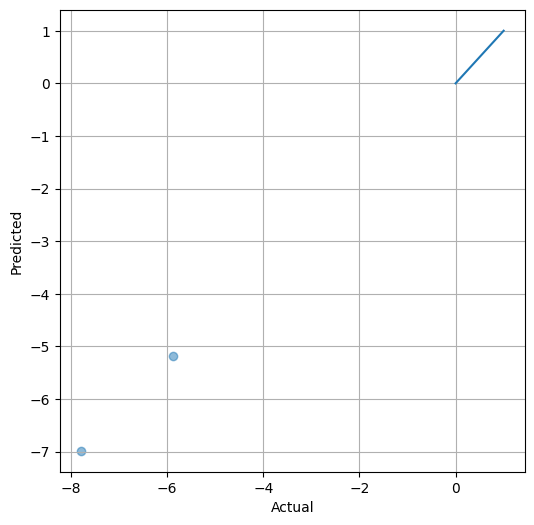

In [52]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([0, 1], [0, 1])
plt.grid(True)
plt.show()